<a href="https://colab.research.google.com/github/Junirey/University-Enrollment-System/blob/main/Almoradie_Junirey_DM_Finals_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sqlite3

def create_and_populate_db():
    with sqlite3.connect('university.db') as conn:
        cursor = conn.cursor()
        cursor.execute('PRAGMA foreign_keys = ON;')

        # Drop tables if they exist to avoid duplicates and constraint errors
        cursor.execute('DROP TABLE IF EXISTS enrollments;')
        cursor.execute('DROP TABLE IF EXISTS courses;')
        cursor.execute('DROP TABLE IF EXISTS students;')
        cursor.execute('DROP TABLE IF EXISTS professors;')
        cursor.execute('DROP TABLE IF EXISTS departments;')

        # Step 1: Create the tables
        cursor.execute('''
            CREATE TABLE departments (
                department_id INTEGER PRIMARY KEY,
                department_name TEXT NOT NULL
            );
        ''')

        cursor.execute('''
            CREATE TABLE professors (
                professor_id INTEGER PRIMARY KEY,
                first_name TEXT NOT NULL,
                last_name TEXT NOT NULL,
                email TEXT NOT NULL UNIQUE,
                department_id INTEGER,
                FOREIGN KEY (department_id) REFERENCES departments(department_id)
            );
        ''')

        cursor.execute('''
            CREATE TABLE students (
                student_id INTEGER PRIMARY KEY,
                first_name TEXT NOT NULL,
                last_name TEXT NOT NULL,
                email TEXT NOT NULL UNIQUE,
                date_of_birth DATE NOT NULL
            );
        ''')

        cursor.execute('''
            CREATE TABLE courses (
                course_id INTEGER PRIMARY KEY,
                course_name TEXT NOT NULL,
                department_id INTEGER,
                professor_id INTEGER,
                units INTEGER NOT NULL,
                capacity INTEGER NOT NULL,
                day TEXT,
                start_time TEXT,
                end_time TEXT,
                FOREIGN KEY (department_id) REFERENCES departments(department_id),
                FOREIGN KEY (professor_id) REFERENCES professors(professor_id)
            );
        ''')

        cursor.execute('''
            CREATE TABLE enrollments (
                enrollment_id INTEGER PRIMARY KEY,
                student_id INTEGER,
                course_id INTEGER,
                enrollment_date DATE NOT NULL,
                FOREIGN KEY (student_id) REFERENCES students(student_id),
                FOREIGN KEY (course_id) REFERENCES courses(course_id),
                UNIQUE (student_id, course_id)
            );
        ''')

        # Step 2: Insert sample data into the departments table
        cursor.executemany('''
            INSERT INTO departments (department_name) VALUES (?);
        ''', [('Computer Science',), ('Mathematics',)])

        # Step 3: Insert sample data into the professors table
        cursor.executemany('''
            INSERT INTO professors (first_name, last_name, email, department_id)
            VALUES (?, ?, ?, ?);
        ''', [
            ('John', 'Doe', 'john.doe@university.com', 1),
            ('Jane', 'Smith', 'jane.smith@university.com', 2),
            ('Alice', 'Johnson', 'alice.johnson@university.com', 1)
        ])

        # Step 4: Insert sample data into the students table
        cursor.executemany('''
            INSERT INTO students (first_name, last_name, email, date_of_birth)
            VALUES (?, ?, ?, ?);
        ''', [
            ('Adam', 'Smith', 'adam.smith@student.com', '2000-01-01'),
            ('Betty', 'Johnson', 'betty.johnson@student.com', '2000-02-01'),
            ('Charlie', 'Brown', 'charlie.brown@student.com', '2000-03-01'),
            ('David', 'Williams', 'david.williams@student.com', '2000-04-01'),
            ('Eve', 'Davis', 'eve.davis@student.com', '2000-05-01'),
            ('Frank', 'Martinez', 'frank.martinez@student.com', '2000-06-01'),
            ('Grace', 'Garcia', 'grace.garcia@student.com', '2000-07-01'),
            ('Hannah', 'Wilson', 'hannah.wilson@student.com', '2000-08-01')
        ])

        # Step 5: Insert sample data into the courses table
        cursor.executemany('''
            INSERT INTO courses (course_name, department_id, professor_id,\
            units, capacity, day, start_time, end_time)
            VALUES (?, ?, ?, ?, ?, ?, ?, ?)
        ''', [
            ('Intro to Programming', 1, 1, 3, 30, 'Mon', '09:00', '11:00'),
            ('Data Structures', 1, 2, 4, 40, 'Tue', '10:00', '12:00'),
            ('Calculus I', 2, 3, 3, 25, 'Wed', '09:00', '11:00'),
            ('Linear Algebra', 2, 2, 3, 35, 'Thu', '13:00', '15:00'),
            ('Algorithms', 1, 1, 4, 30, 'Fri', '09:00', '11:00'),
            ('Machine Learning', 1, 1, 4, 30, 'Mon', '13:00', '15:00'),
            ('Database Systems', 1, 2, 4, 40, 'Tue', '13:00', '15:00'),
            ('Statistics', 2, 3, 3, 25, 'Wed', '11:00', '13:00'),
            ('Calculus II', 2, 3, 3, 25, 'Thu', '09:00', '11:00'),
            ('Artificial Intelligence', 1, 1, 4, 30, 'Fri', '13:00', '15:00'),
            ('Operating Systems', 1, 2, 4, 40, 'Mon', '15:00', '17:00'),
            ('Linear Programming', 2, 3, 3, 25, 'Tue', '15:00', '17:00'),
            ('Data Mining', 1, 1, 4, 30, 'Wed', '15:00', '17:00'),
            ('Software Engineering', 1, 2, 4, 40, 'Thu', '15:00', '17:00'),
            ('Probability Theory', 2, 3, 3, 25, 'Fri', '15:00', '17:00'),
            ('Computer Graphics', 1, 1, 4, 30, 'Tue', '09:00', '11:00'),
            ('Computer Architecture', 1, 2, 4, 40, 'Thu', '11:00', '13:00'),
            ('Differential Equations', 2, 3, 3, 25, 'Fri', '11:00', '13:00')
        ])


        # Step 6: Insert sample data into the enrollments table
        cursor.executemany('''
            INSERT INTO enrollments (student_id, course_id, enrollment_date)
            VALUES (?, ?, CURRENT_DATE);
        ''', [
            (1, 1), (2, 1), (3, 2), (4, 3), (5, 4),
            (6, 5), (7, 3), (8, 4), (1, 5), (2, 3)
        ])

        # Commit changes
        conn.commit()

# Run the function to create and populate the database
create_and_populate_db()

print("Database 'university.db' created and populated successfully.")


Database 'university.db' created and populated successfully.



--- University Enrollment System ---

1. Manage Students
2. Manage Professors
3. Manage Courses
4. Manage Enrollments
5. Manage Departments
6. View Course Roster
7. View Student Timetable
8. Department Level Summary
9. Student Course Enrollment
10. CSV Report Generator
11. Exit
Enter your choice: 1

-- Manage Students --
1. Create Student
2. Read Students
3. Update Student
4. Delete Student
5. Back to Main Menu
Enter your choice: 1
Enter student's first name: Juan
Enter student's last name: De La Cruz
Enter student's email: jdelacruz@student.com
Enter student's date of birth (YYYY-MM-DD): 2001-01-01
Student created successfully.

-- Manage Students --
1. Create Student
2. Read Students
3. Update Student
4. Delete Student
5. Back to Main Menu
Enter your choice: 2

--- Students ---
   student_id first_name   last_name                       email date_of_birth
0           1       Adam       Smith      adam.smith@student.com    2000-01-01
1           2      Betty     Johnson   betty.johns

Saving enrollment_data_2025.csv to enrollment_data_2025.csv
Loaded enrollment_data_2025.csv

Preview of the data:
      student         professor   department   course
0  Student001   Dr. Grace Black  Mathematics  MATH201
1  Student002   Dr. Grace Black  Mathematics  MATH301
2  Student003  Dr. Irene Thomas    Chemistry  CHEM101
3  Student004   Dr. Grace Black  Mathematics  MATH101
4  Student005     Dr. David Kim    Chemistry  CHEM201

-- CSV Report Generator --
1. Load CSV File
2. Generate Enrollment Summary
3. Visualize Enrollment per Department
4. Back to Main Menu
Enter your choice: 2

Enrollment Summary per Department:
department
Mathematics         44
Computer Science    36
Biology             25
Chemistry           23
Physics             22
Name: student, dtype: int64

-- CSV Report Generator --
1. Load CSV File
2. Generate Enrollment Summary
3. Visualize Enrollment per Department
4. Back to Main Menu
Enter your choice: 3


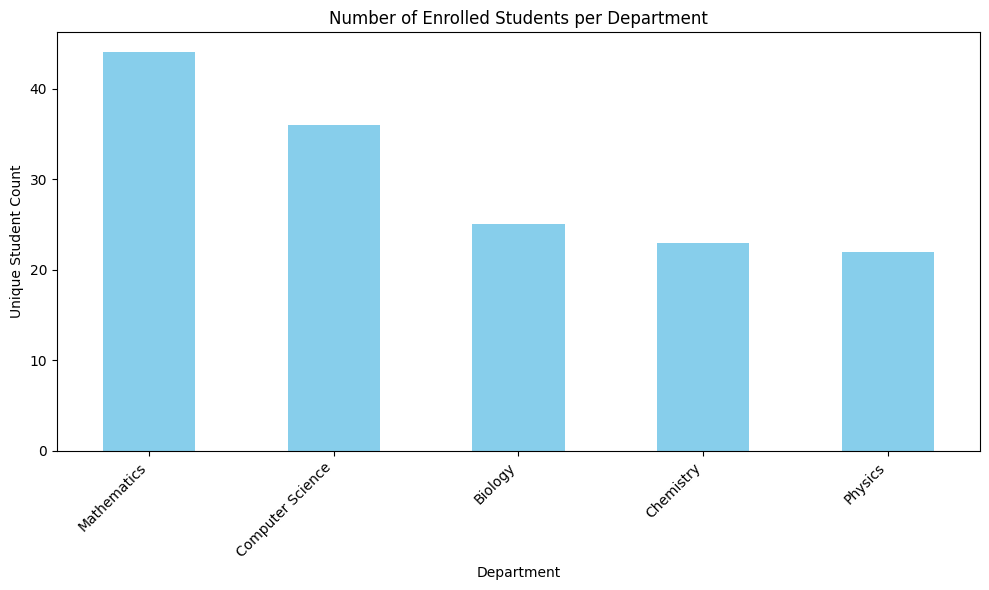


-- CSV Report Generator --
1. Load CSV File
2. Generate Enrollment Summary
3. Visualize Enrollment per Department
4. Back to Main Menu


In [ ]:

import sqlite3
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from datetime import datetime
from google.colab import files


class Database:
    def __init__(self, db_name='university.db'):
        self.db_name = db_name

    def get_connection(self):
        return sqlite3.connect(self.db_name)

class Student:
    def __init__(self, db: Database):
        self.db = db

    def create(self):
        conn = self.db.get_connection()
        cursor = conn.cursor()
        first_name = input("Enter student's first name: ")
        last_name = input("Enter student's last name: ")
        email = input("Enter student's email: ")
        dob = input("Enter student's date of birth (YYYY-MM-DD): ")

        cursor.execute('''INSERT INTO students (first_name, last_name, email, date_of_birth)
                          VALUES (?, ?, ?, ?)''', (first_name, last_name, email, dob))
        conn.commit()
        print("Student created successfully.")
        conn.close()

    def read(self):
        conn = self.db.get_connection()
        df = pd.read_sql_query('SELECT * FROM students', conn)
        print("\n--- Students ---")
        print(df)
        conn.close()

    def update(self):
        conn = self.db.get_connection()
        cursor = conn.cursor()
        student_id = int(input("Enter student ID to update: "))
        first_name = input("Enter new first name: ")
        last_name = input("Enter new last name: ")
        email = input("Enter new email: ")
        dob = input("Enter new date of birth (YYYY-MM-DD): ")

        cursor.execute('''UPDATE students
                          SET first_name = ?, last_name = ?, email = ?, date_of_birth = ?
                          WHERE student_id = ?''', (first_name, last_name, email, dob, student_id))
        conn.commit()
        print("Student updated successfully.")
        conn.close()

    def delete(self):
        conn = self.db.get_connection()
        cursor = conn.cursor()
        student_id = int(input("Enter student ID to delete: "))

        cursor.execute('''DELETE FROM students WHERE student_id = ?''', (student_id,))
        conn.commit()
        print("Student deleted successfully.")
        conn.close()

class Professor:
    def __init__(self, db: Database):
        self.db = db

    def create(self):
        conn = self.db.get_connection()
        cursor = conn.cursor()
        first_name = input("Enter professor's first name: ")
        last_name = input("Enter professor's last name: ")
        email = input("Enter professor's email: ")
        department_id = int(input("Enter department ID (1 for CS, 2 for Mathematics): "))

        cursor.execute('''INSERT INTO professors (first_name, last_name, email, department_id)
                          VALUES (?, ?, ?, ?)''', (first_name, last_name, email, department_id))
        conn.commit()
        print("Professor created successfully.")
        conn.close()

    def read(self):
        conn = self.db.get_connection()
        df = pd.read_sql_query('SELECT * FROM professors', conn)
        print("\n--- Professors ---")
        print(df)
        conn.close()

    def update(self):
        conn = self.db.get_connection()
        cursor = conn.cursor()
        professor_id = int(input("Enter professor ID to update: "))
        first_name = input("Enter new first name: ")
        last_name = input("Enter new last name: ")
        email = input("Enter new email: ")
        department_id = int(input("Enter new department ID (1 for CS, 2 for Mathematics): "))

        cursor.execute('''UPDATE professors
                          SET first_name = ?, last_name = ?, email = ?, department_id = ?
                          WHERE professor_id = ?''', (first_name, last_name, email, department_id, professor_id))
        conn.commit()
        print("Professor updated successfully.")
        conn.close()

    def delete(self):
        conn = self.db.get_connection()
        cursor = conn.cursor()
        professor_id = int(input("Enter professor ID to delete: "))

        cursor.execute('''DELETE FROM professors WHERE professor_id = ?''', (professor_id,))
        conn.commit()
        print("Professor deleted successfully.")
        conn.close()

class Course:
    def __init__(self, db):
        self.db = db

    def create(self):
        conn = self.db.get_connection()
        cursor = conn.cursor()

        course_name = input("Enter course name: ")
        department_id = int(input("Enter department ID (1 for CS, 2 for Mathematics): "))
        professor_id = int(input("Enter professor ID: "))
        units = int(input("Enter number of units: "))
        capacity = int(input("Enter course capacity: "))
        day = input("Enter day of class (e.g., Monday): ")
        start_time = input("Enter start time (HH:MM): ")
        end_time = input("Enter end time (HH:MM): ")

        cursor.execute('''
            INSERT INTO courses (course_name, department_id, professor_id, units, capacity, day, start_time, end_time)
            VALUES (?, ?, ?, ?, ?, ?, ?, ?)
        ''', (course_name, department_id, professor_id, units, capacity, day, start_time, end_time))

        conn.commit()
        print("Course created successfully.")
        conn.close()

    def read(self):
        conn = self.db.get_connection()
        df = pd.read_sql_query('SELECT * FROM courses', conn)
        print("\n--- Courses ---")
        if df.empty:
            print("No courses found.")
        else:
            print(df[['course_id', 'course_name', 'department_id', 'professor_id', 'units', 'capacity', 'day', 'start_time', 'end_time']])
        conn.close()

    def update(self):
        conn = self.db.get_connection()
        cursor = conn.cursor()

        course_id = int(input("Enter course ID to update: "))
        course_name = input("Enter new course name: ")
        department_id = int(input("Enter new department ID (1 for CS, 2 for Mathematics): "))
        professor_id = int(input("Enter new professor ID: "))
        units = int(input("Enter new number of units: "))
        capacity = int(input("Enter new course capacity: "))
        day = input("Enter new day of class (e.g., Monday): ")
        start_time = input("Enter new start time (HH:MM): ")
        end_time = input("Enter new end time (HH:MM): ")

        cursor.execute('''
            UPDATE courses
            SET course_name = ?, department_id = ?, professor_id = ?, units = ?, capacity = ?, day = ?, start_time = ?, end_time = ?
            WHERE course_id = ?
        ''', (course_name, department_id, professor_id, units, capacity, day, start_time, end_time, course_id))

        conn.commit()
        print("Course updated successfully.")
        conn.close()

    def delete(self):
        conn = self.db.get_connection()
        cursor = conn.cursor()

        course_id = int(input("Enter course ID to delete: "))
        cursor.execute('DELETE FROM courses WHERE course_id = ?', (course_id,))
        conn.commit()

        print("Course deleted successfully.")
        conn.close()

class Enrollment:
    def __init__(self, db: Database):
        self.db = db

    def create(self):
        conn = self.db.get_connection()
        cursor = conn.cursor()
        student_id = int(input("Enter student ID: "))
        course_id = int(input("Enter course ID: "))

        cursor.execute('''INSERT INTO enrollments (student_id, course_id, enrollment_date)
                          VALUES (?, ?, CURRENT_DATE)''', (student_id, course_id))
        conn.commit()
        print("Enrollment created successfully.")
        conn.close()

    def read(self):
        conn = self.db.get_connection()
        df = pd.read_sql_query('SELECT * FROM enrollments', conn)
        print("\n--- Enrollments ---")
        print(df)
        conn.close()

    def update(self):
        conn = self.db.get_connection()
        cursor = conn.cursor()
        student_id = int(input("Enter student ID to update enrollment: "))
        course_id = int(input("Enter course ID to update enrollment: "))

        cursor.execute('''UPDATE enrollments
                          SET enrollment_date = CURRENT_DATE
                          WHERE student_id = ? AND course_id = ?''', (student_id, course_id))
        conn.commit()
        print("Enrollment updated successfully.")
        conn.close()

    def delete(self):
        conn = self.db.get_connection()
        cursor = conn.cursor()
        student_id = int(input("Enter student ID to delete enrollment: "))
        course_id = int(input("Enter course ID to delete enrollment: "))

        cursor.execute('''DELETE FROM enrollments WHERE student_id = ? AND course_id = ?''', (student_id, course_id))
        conn.commit()
        print("Enrollment deleted successfully.")
        conn.close()

class Department:
    def __init__(self, db: Database):
        self.db = db

    def create(self):
        name = input("Enter department name: ")
        head = input("Enter department head: ")
        conn = self.db.get_connection()
        cursor = conn.cursor()
        try:
            cursor.execute(
                "INSERT INTO departments (department_name, department_head) VALUES (?, ?)",
                (name, head),
            )
            conn.commit()
            print("Department created successfully.")
        except sqlite3.Error as e:
            print(f"Error creating department: {e}")
        finally:
            conn.close()

    def read(self):
      conn = self.db.get_connection()
      cursor = conn.cursor()
      try:
          cursor.execute("SELECT * FROM departments")
          rows = cursor.fetchall()
          if rows:
              print("\nDepartments:")
              for row in rows:
                  print(f"ID: {row[0]}, Name: {row[1]}")
          else:
              print("No departments found.")
      except sqlite3.Error as e:
          print(f"Error reading departments: {e}")
      finally:
          conn.close()


    def update(self):
        dept_id = input("Enter department ID to update: ")
        conn = self.db.get_connection()
        cursor = conn.cursor()
        try:
            cursor.execute(
                "SELECT * FROM departments WHERE department_id = ?", (dept_id,)
            )
            row = cursor.fetchone()
            if row is None:
                print(f"No department found with ID {dept_id}.")
                return

            new_name = input(f"Enter new name [{row[1]}]: ") or row[1]
            new_head = input(f"Enter new head [{row[2]}]: ") or row[2]

            cursor.execute(
                "UPDATE departments SET department_name = ?, department_head = ? WHERE department_id = ?",
                (new_name, new_head, dept_id),
            )
            conn.commit()
            print("Department updated successfully.")
        except sqlite3.Error as e:
            print(f"Error updating department: {e}")
        finally:
            conn.close()

    def delete(self):
        dept_id = input("Enter department ID to delete: ")
        conn = self.db.get_connection()
        cursor = conn.cursor()
        try:
            cursor.execute(
                "SELECT * FROM departments WHERE department_id = ?", (dept_id,)
            )
            row = cursor.fetchone()
            if row is None:
                print(f"No department found with ID {dept_id}.")
                return

            confirm = input(f"Are you sure you want to delete department {dept_id}? (y/n): ")
            if confirm.lower() == 'y':
                cursor.execute(
                    "DELETE FROM departments WHERE department_id = ?", (dept_id,)
                )
                conn.commit()
                print("Department deleted successfully.")
            else:
                print("Deletion cancelled.")
        except sqlite3.Error as e:
            print(f"Error deleting department: {e}")
        finally:
            conn.close()


class StudentEnrollmentManager:
    def __init__(self, db, max_units=18):
        self.db = db
        self.max_units = max_units

    def get_enrolled_units(self, student_id):
        conn = self.db.get_connection()
        cursor = conn.cursor()
        query = '''
            SELECT SUM(c.units)
            FROM enrollments e
            JOIN courses c ON e.course_id = c.course_id
            WHERE e.student_id = ?;
        '''
        cursor.execute(query, (student_id,))
        result = cursor.fetchone()[0]
        conn.close()
        return result if result is not None else 0

    def get_course_units(self, course_id):
        conn = self.db.get_connection()
        cursor = conn.cursor()
        cursor.execute('SELECT units FROM courses WHERE course_id = ?;', (course_id,))
        result = cursor.fetchone()
        conn.close()
        return result[0] if result else None

    def enroll_student(self, student_id, course_id):
        conn = self.db.get_connection()
        cursor = conn.cursor()

        # 1. Get current enrolled units
        cursor.execute('''
            SELECT SUM(c.units)
            FROM enrollments e
            JOIN courses c ON e.course_id = c.course_id
            WHERE e.student_id = ?
        ''', (student_id,))
        current_units = cursor.fetchone()[0] or 0

        # 2. Get course units and capacity
        cursor.execute('''
            SELECT units, capacity FROM courses WHERE course_id = ?
        ''', (course_id,))
        result = cursor.fetchone()

        if not result:
            conn.close()
            return "Course not found."

        course_units, capacity = result

        # 3. Check if course is already full
        cursor.execute('''
            SELECT COUNT(*) FROM enrollments WHERE course_id = ?
        ''', (course_id,))
        enrolled = cursor.fetchone()[0]

        if enrolled >= capacity:
            conn.close()
            return "Course is full."

        # 4. Check if student is already enrolled in the course
        cursor.execute('''
            SELECT 1 FROM enrollments WHERE student_id = ? AND course_id = ?
        ''', (student_id, course_id))
        if cursor.fetchone():
            conn.close()
            return "Student is already enrolled in this course."

        # 5. Check unit cap before enrolling
        if current_units + course_units > 18:
            conn.close()
            return f"Enrolling exceeds the 18-unit cap. Currently enrolled: {current_units} units. This course: {course_units} units."

        # 6. Proceed with enrollment
        enrollment_date = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        cursor.execute('''
            INSERT INTO enrollments (student_id, course_id, enrollment_date)
            VALUES (?, ?, ?)
        ''', (student_id, course_id, enrollment_date))
        conn.commit()
        conn.close()

        return "Enrollment successful!"


    def view_student_timetable(self, student_id):
        conn = self.db.get_connection()
        cursor = conn.cursor()
        cursor.execute('''
            SELECT c.course_name, c.day, c.start_time, c.end_time
            FROM enrollments e
            JOIN courses c ON e.course_id = c.course_id
            WHERE e.student_id = ?
            ORDER BY
                CASE c.day
                    WHEN 'Mon' THEN 1
                    WHEN 'Tue' THEN 2
                    WHEN 'Wed' THEN 3
                    WHEN 'Thu' THEN 4
                    WHEN 'Fri' THEN 5
                    WHEN 'Sat' THEN 6
                    WHEN 'Sun' THEN 7
                END,
                c.start_time
        ''', (student_id,))
        rows = cursor.fetchall()

        if not rows:
            print(f"No courses enrolled for student ID {student_id}.")
            return

        from collections import defaultdict
        schedule = defaultdict(list)
        for course, day, start, end in rows:
            schedule[day].append(f"{start} - {end} → {course}")

        print(f"\nTimetable for Student ID: {student_id}")
        print("─" * 50)
        for day in ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]:
            print(f"{day:<10}:", end=" ")
            if schedule[day]:
                print()
                for line in schedule[day]:
                    print(f"  • {line}")
            else:
                print("(no classes)")
        print("─" * 50)

class DepartmentSummary:
    def __init__(self, db: Database):
        self.db = db

    def summary(self, dept_id=None):
        if dept_id is None:
            dept_id = input("Enter department ID for summary: ")

        conn = self.db.get_connection()
        cursor = conn.cursor()

        try:
            # Check if department exists
            cursor.execute("SELECT department_name FROM departments WHERE department_id = ?", (dept_id,))
            dept = cursor.fetchone()
            if dept is None:
                print(f"No department found with ID {dept_id}.")
                return

            dept_name = dept[0]

            # Number of courses in department
            cursor.execute("SELECT COUNT(*) FROM courses WHERE department_id = ?", (dept_id,))
            num_courses = cursor.fetchone()[0]

            # Number of distinct students enrolled in department's courses
            cursor.execute("""
                SELECT COUNT(DISTINCT e.student_id)
                FROM enrollments e
                JOIN courses c ON e.course_id = c.course_id
                WHERE c.department_id = ?
            """, (dept_id,))
            num_students = cursor.fetchone()[0]

            # Average section size (students per course)
            cursor.execute("""
                SELECT AVG(course_count) FROM (
                    SELECT COUNT(e.student_id) as course_count
                    FROM courses c
                    LEFT JOIN enrollments e ON c.course_id = e.course_id
                    WHERE c.department_id = ?
                    GROUP BY c.course_id
                )
            """, (dept_id,))
            avg_section_size = cursor.fetchone()[0] or 0

            print(f"\nDepartment Summary for '{dept_name}':")
            print(f" - Number of Courses: {num_courses}")
            print(f" - Number of Students Enrolled: {num_students}")
            print(f" - Average Section Size: {avg_section_size:.2f}")

        except sqlite3.Error as e:
            print(f"Error fetching department summary: {e}")
        finally:
            conn.close()


class CSVReportGenerator:
    def __init__(self):
        self.df = None
        self.enrollment_summary = None

    def load_csv(self):
        print("Upload your CSV file.")
        uploaded = files.upload()
        filename = next(iter(uploaded))
        self.df = pd.read_csv(io.BytesIO(uploaded[filename]))
        print(f"Loaded {filename}")
        print("\nPreview of the data:")
        print(self.df.head())

    def generate_summary(self):
        if self.df is None:
            print("Please load the CSV file first.")
            return

        required_columns = {'student', 'department'}
        if not required_columns.issubset(set(self.df.columns)):
            print(f"Missing columns. Required columns: {required_columns}")
            return

        self.enrollment_summary = (
            self.df.groupby('department')['student']
            .nunique()
            .sort_values(ascending=False)
        )

        print("\nEnrollment Summary per Department:")
        print(self.enrollment_summary)

    def simple_visualization(self):
        if self.enrollment_summary is None:
            print("Please generate the summary first before visualizing.")
            return

        plt.figure(figsize=(10, 6))
        self.enrollment_summary.plot(kind='bar', color='skyblue')
        plt.title("Number of Enrolled Students per Department")
        plt.xlabel("Department")
        plt.ylabel("Unique Student Count")
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()


class UniversitySystem:
    def __init__(self):
        self.db = Database()
        self.student = Student(self.db)
        self.professor = Professor(self.db)
        self.course = Course(self.db)
        self.department = Department(self.db)
        self.enrollment = Enrollment(self.db)
        self.enrollment_manager = StudentEnrollmentManager(self.db)
        self.department_summary = DepartmentSummary(self.db)
        self.csv_report_generator = CSVReportGenerator()

        self.current_student_id = None

    def set_current_student(self):
        student_id = input("Enter Student ID: ").strip()
        self.current_student_id = student_id

    def student_enrollment_cli(self):
      if not self.current_student_id:
          print("No student logged in yet.")
          self.set_current_student()

      student_id = self.current_student_id
      print(f"\n--- Enrollment CLI for Student ID: {student_id} ---")

      while True:
          print("\nEnrollment Menu:")
          print("1. View Current Enrolled Units")
          print("2. View Available Courses")
          print("3. Enroll in a Course")
          print("4. Back to Main Menu")

          choice = input("Choose an option (1-4): ").strip()

          if choice == '1':
              units = self.enrollment_manager.get_enrolled_units(student_id)
              print(f"Total Enrolled Units: {units} / {self.enrollment_manager.max_units}")

          elif choice == '2':
              query = '''
                  SELECT c.course_id, c.course_name, c.units, c.capacity,
                      (SELECT COUNT(*) FROM enrollments e WHERE e.course_id = c.course_id) AS enrolled
                  FROM courses c
                  WHERE c.course_id NOT IN (
                      SELECT course_id FROM enrollments WHERE student_id = ?
                  );
              '''
              conn = self.enrollment_manager.db.get_connection()
              cursor = conn.cursor()
              cursor.execute(query, (student_id,))
              courses = cursor.fetchall()

              if not courses:
                  print("No available courses.")
              else:
                  print("Available Courses:")
                  for cid, name, units, capacity, enrolled in courses:
                      print(f"[{cid}] {name} | Units: {units} | Capacity: {enrolled}/{capacity}")

          elif choice == '3':
              course_id = input("Enter Course ID to enroll: ").strip()
              if not course_id.isdigit():
                  print("Invalid Course ID.")
                  continue
              result = self.enrollment_manager.enroll_student(student_id, int(course_id))
              print(result)

          elif choice == '4':
              break

          else:
              print("Invalid choice, try again.")

    def cli_menu(self):
        while True:
            print("\n--- University Enrollment System ---")
            print("\n1. Manage Students")
            print("2. Manage Professors")
            print("3. Manage Courses")
            print("4. Manage Enrollments")
            print("5. Manage Departments")
            print("6. View Course Roster")
            print("7. View Student Timetable")
            print("8. Department Level Summary")
            print("9. Student Course Enrollment")
            print("10. CSV Report Generator")
            print("11. Exit")

            choice = input("Enter your choice: ")

            if choice == '1':
                self.student_menu()
            elif choice == '2':
                self.professor_menu()
            elif choice == '3':
                self.course_menu()
            elif choice == '4':
                self.enrollment_menu()
            elif choice == '5':
                self.department_menu()
            elif choice == '6':
                self.view_course_roster()
            elif choice == '7':
                student_id = input("Enter Student ID to view timetable: ").strip()
                if student_id:
                        self.enrollment_manager.view_student_timetable(student_id)
                else:
                        print("Student ID cannot be empty.")
                self.department_summary_menu()
            elif choice == '8':
                self.department_summary_menu()
            elif choice == '9':
                self.student_enrollment_cli()
            elif choice == '10':
                self.csv_report_generator_menu()
            elif choice == '11':
                print("Exiting...")
                break
            else:
                print("Invalid choice. Please try again.")

    def student_menu(self):
        while True:
            print("\n-- Manage Students --")
            print("1. Create Student")
            print("2. Read Students")
            print("3. Update Student")
            print("4. Delete Student")
            print("5. Back to Main Menu")

            choice = input("Enter your choice: ")

            if choice == '1':
                self.student.create()
            elif choice == '2':
                self.student.read()
            elif choice == '3':
                self.student.update()
            elif choice == '4':
                self.student.delete()
            elif choice == '5':
                break
            else:
                print("Invalid choice. Please try again.")

    def professor_menu(self):
        while True:
            print("\n-- Manage Professors --")
            print("1. Create Professor")
            print("2. Read Professors")
            print("3. Update Professor")
            print("4. Delete Professor")
            print("5. Back to Main Menu")

            choice = input("Enter your choice: ")

            if choice == '1':
                self.professor.create()
            elif choice == '2':
                self.professor.read()
            elif choice == '3':
                self.professor.update()
            elif choice == '4':
                self.professor.delete()
            elif choice == '5':
                break
            else:
                print("Invalid choice. Please try again.")

    def course_menu(self):
        while True:
            print("\n-- Manage Courses --")
            print("1. Create Course")
            print("2. Read Courses")
            print("3. Update Course")
            print("4. Delete Course")
            print("5. Back to Main Menu")

            choice = input("Enter your choice: ")

            if choice == '1':
                self.course.create()
            elif choice == '2':
                self.course.read()
            elif choice == '3':
                self.course.update()
            elif choice == '4':
                self.course.delete()
            elif choice == '5':
                break
            else:
                print("Invalid choice. Please try again.")

    def enrollment_menu(self):
        while True:
            print("\n-- Manage Enrollments --")
            print("1. Create Enrollment")
            print("2. Read Enrollments")
            print("3. Update Enrollment")
            print("4. Delete Enrollment")
            print("5. Back to Main Menu")

            choice = input("Enter your choice: ")

            if choice == '1':
                self.enrollment.create()
            elif choice == '2':
                self.enrollment.read()
            elif choice == '3':
                self.enrollment.update()
            elif choice == '4':
                self.enrollment.delete()
            elif choice == '5':
                break
            else:
                print("Invalid choice. Please try again.")


    def department_menu(self):
      while True:
          print("\n-- Manage Departments --")
          print("1. Create Department")
          print("2. Read Departments")
          print("3. Update Department")
          print("4. Delete Department")
          print("5. Back to Main Menu")

          choice = input("Enter your choice: ")

          if choice == '1':
              self.department.create()
          elif choice == '2':
              self.department.read()
          elif choice == '3':
              self.department.update()
          elif choice == '4':
              self.department.delete()
          elif choice == '5':
              break
          else:
              print("Invalid choice. Please try again.")

    def view_course_roster(self):
        course_id = input("Enter Course ID to view roster: ").strip()
        if not course_id.isdigit():
            print("Invalid Course ID.")
            return

        course_id = int(course_id)
        conn = self.db.get_connection()
        cursor = conn.cursor()

        # Get course info and professor name
        cursor.execute('''
            SELECT c.course_name, c.units, p.first_name || ' ' || p.last_name AS professor_name
            FROM courses c
            LEFT JOIN professors p ON c.professor_id = p.professor_id
            WHERE c.course_id = ?;
        ''', (course_id,))
        course_info = cursor.fetchone()

        if not course_info:
            print(f"No course found with ID {course_id}.")
            conn.close()
            return

        course_name, units, professor_name = course_info
        print(f"\nCourse: {course_name} (Units: {units})")
        print(f"Professor: {professor_name if professor_name else 'N/A'}")

      # Get enrolled students
        cursor.execute('''
            SELECT s.student_id, s.first_name || ' ' || s.last_name AS student_name
            FROM enrollments e
            JOIN students s ON e.student_id = s.student_id
            WHERE e.course_id = ?;
        ''', (course_id,))
        students = cursor.fetchall()

        if not students:
            print("No students currently enrolled in this course.")
        else:
            print("\nEnrolled Students:")
            for sid, sname in students:
                print(f" - {sid}: {sname}")

        conn.close()

    def read_student_timetable(self):
        student_id = input("Enter Student ID to view timetable: ").strip()

        conn = self.db.get_connection()
        cursor = conn.cursor()

        try:
            cursor.execute('''
                SELECT c.course_id, c.course_name, c.units, c.schedule,
                      p.first_name || ' ' || p.last_name AS professor_name,
                      d.department_name
                FROM enrollments e
                JOIN courses c ON e.course_id = c.course_id
                LEFT JOIN professors p ON c.professor_id = p.professor_id
                LEFT JOIN departments d ON c.department_id = d.department_id
                WHERE e.student_id = ?
            ''', (student_id,))

            results = cursor.fetchall()

            if results:
                print(f"\nTimetable for Student ID {student_id}:")
                for cid, name, units, schedule, prof, dept in results:
                    print(f"• {name} (ID: {cid}) | Units: {units} | Schedule: {schedule} | Prof: {prof} | Dept: {dept}")
            else:
                print("No courses found for this student.")

        except Exception as e:
            print(f"Error: {e}")

        finally:
            conn.close()

    def student_enrollment_cli(self):
        print("\n--- Student Course Enrollment CLI ---")
        student_id = input("Enter Student ID: ").strip()

        while True:
            print("\n Enrollment Menu:")
            print("1. View Current Enrolled Units")
            print("2. View Available Courses")
            print("3. Enroll in a Course")
            print("4. View Max Units")
            print("5. Set Max Units")
            print("6. Back to Main Menu")

            choice = input("Choose an option (1-6): ").strip()

            if choice == '1':
                units = self.enrollment_manager.get_enrolled_units(student_id)
                print(f"Total Enrolled Units: {units} / {self.enrollment_manager.max_units}")

            elif choice == '2':
                query = '''
                    SELECT c.course_id, c.course_name, c.units, c.capacity,
                          (SELECT COUNT(*) FROM enrollments e WHERE e.course_id = c.course_id) AS enrolled
                    FROM courses c
                    WHERE c.course_id NOT IN (
                        SELECT course_id FROM enrollments WHERE student_id = ?
                    );
                '''
                conn = self.db.get_connection()
                cursor = conn.cursor()
                cursor.execute(query, (student_id,))
                courses = cursor.fetchall()
                conn.close()

                if not courses:
                    print("No available courses to enroll.")
                else:
                    print("\n Available Courses:")
                    for cid, name, units, capacity, enrolled in courses:
                        print(f"  [{cid}] {name} | Units: {units} | Capacity: {enrolled}/{capacity}")

            elif choice == '3':
                course_id = input("Enter Course ID to enroll: ").strip()
                if not course_id.isdigit():
                    print("Invalid Course ID.")
                    continue
                result = self.enrollment_manager.enroll_student(student_id, course_id)
                print(result)

            elif choice == '4':
                print(f"Current max units allowed per student: {self.enrollment_manager.max_units}")
            elif choice == '5':
                new_max = input("Enter new max units (positive integer): ").strip()
                if new_max.isdigit() and int(new_max) > 0:
                    self.enrollment_manager.max_units = int(new_max)
                    print(f"Max units updated to {self.enrollment_manager.max_units}")
                else:
                    print("Invalid input. Max units not changed.")

            elif choice == '6':
                break

            else:
                print("Invalid choice. Try again.")

    def department_summary_menu(self):
      while True:
          print("\n-- Department Summary Menu --")
          print("1. Show Department Summary")
          print("2. Back to Main Menu")

          choice = input("Enter your choice: ")

          if choice == '1':
              dept_id = input("Enter Department ID: ").strip()
              if dept_id.isdigit():
                    self.department_summary.summary(int(dept_id))
              else:
                    print("Invalid Department ID. Please enter a numeric value.")
          elif choice == '2':
                break
          else:
                print("Invalid choice. Please try again.")

    def csv_report_generator_menu(self):
      while True:
          print("\n-- CSV Report Generator --")
          print("1. Load CSV File")
          print("2. Generate Enrollment Summary")
          print("3. Visualize Enrollment per Department")
          print("4. Back to Main Menu")

          choice = input("Enter your choice: ")

          if choice == '1':
              self.csv_report_generator.load_csv()
          elif choice == '2':
              self.csv_report_generator.generate_summary()
          elif choice == '3':
              self.csv_report_generator.simple_visualization()
          elif choice == '4':
              break
          else:
              print("Invalid choice. Please try again.")

if __name__ == '__main__':
    university_system = UniversitySystem()
    university_system.cli_menu()
